In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay
import tensorflow
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout

2024-08-23 15:32:35.497857: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-23 15:32:35.503747: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-23 15:32:36.825437: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
#tensorflow.keras.backend.clear_session()

In [34]:
df = pd.read_csv('Data_LAB.csv')
df = df.head(200000)
# Todos los datos
#df = pd.read_csv('/home/alejandro/Documentos/Data_LAB.csv')
X = df[['L','a','b']].values
y = df['class'].values

In [35]:
# Convertimos las etiquetas a valores numéricos
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['class'].values)

In [36]:
# Verificar la forma de las etiquetas
print("Forma original de y_encoded:", y_encoded.shape)

Forma original de y_encoded: (200000,)


In [37]:
# Aseguramos que las etiquetas estén codificadas como one-hot
y_categorical = to_categorical(y_encoded, num_classes=3)  # num_classes=3 para garantizar que haya 3 clases

In [38]:
# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['L', 'a', 'b']].values)

In [39]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=42)

In [40]:
X_train.shape

(160000, 3)

In [41]:
# Construcción del modelo de red neuronal
model = Sequential([Dense(10, input_dim=3, activation='relu'),
                    Dropout(0.2),
                    Dense(100, activation='relu'),
                    Dropout(0.2),
                    Dense(100, activation='relu'),
                    Dropout(0.2),
                    Dense(20, activation='relu'),
                    Dropout(0.2),
                    Dense(3, activation='softmax')
                   ])

# Capa de entrada con 3 neuronas (una por cada característica), y una capa oculta con 10 neuronas
#model.add(Dense(10, input_dim=3, activation='relu'))

# Otra capa oculta con 10 neuronas
#model.add(Dense(10, activation='relu'))

# Capa de salida con 3 neuronas (una por cada clase) y softmax para clasificación multiclase
#model.add(Dense(3, activation='softmax'))

# Compilar el modelo
metrics = ['accuracy', tensorflow.keras.metrics.Precision(), tensorflow.keras.metrics.Recall()]

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=metrics)

/home/alejandro/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
#tensorflow.keras.utils.plot_model(model)
#from tensorflow.keras.utils import plot_model
#plot_model(model)

In [43]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 10)             │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │         1,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 20)             │         2,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3)              │            63 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,323 (52.04 KB)

 Trainable params: 13,323 (52.04 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=20, batch_size=15, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
10667/10667 ━━━━━━━━━━━━━━━━━━━━ 31s 3ms/step - accuracy: 0.8481 - loss: 0.4007 - precision_1: 0.8556 - recall_1: 0.8298 - val_accuracy: 0.8691 - val_loss: 0.3246 - val_precision_1: 0.8693 - val_recall_1: 0.8690
Epoch 2/20
10667/10667 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - accuracy: 0.8639 - loss: 0.3424 - precision_1: 0.8644 - recall_1: 0.8633 - val_accuracy: 0.8698 - val_loss: 0.3186 - val_precision_1: 0.8699 - val_recall_1: 0.8698
Epoch 3/20
10667/10667 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - accuracy: 0.8673 - loss: 0.3338 - precision_1: 0.8677 - recall_1: 0.8669 - val_accuracy: 0.8609 - val_loss: 0.3402 - val_precision_1: 0.8609 - val_recall_1: 0.8608
Epoch 4/20
10667/10667 ━━━━━━━━━━━━━━━━━━━━ 32s 3ms/step - accuracy: 0.8670 - loss: 0.3283 - precision_1: 0.8673 - recall_1: 0.8667 - val_accuracy: 0.8644 - val_loss: 0.3263 - val_precision_1: 0.8647 - val_recall_1: 0.8643
Epoch 5/20
10667/10667 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - accuracy: 0.8674 - loss: 0.3297 - precision_1: 0.

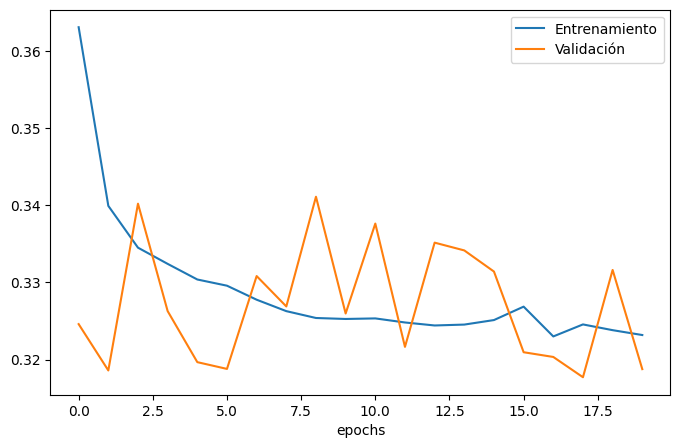

In [45]:
history_model = history.history

# Crear un DataFrame con las columnas 'loss' y 'val_loss'
df = pd.DataFrame({
    'Entrenamiento': history_model['loss'],
    'Validación': history_model['val_loss']
})

df.plot(figsize=(8,5))
#pd.DataFrame(history_model['loss']).plot(figsize=(8,5))
plt.xlabel('epochs')
#plt.ylabel('accuracy / loss')
plt.show()

In [46]:
df1 = pd.read_csv('Data_LABtest.csv')
X_new = df1[['L', 'a', 'b']].values
y_true = df1['class'].values

In [47]:
X_new_scaled = scaler.fit_transform(X_new)

In [48]:
# Hacer predicciones con el modelo entrenado
predictions = model.predict(X_new_scaled)

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


In [49]:
# Convertir las predicciones a etiquetas de clase
predicted_classes = np.argmax(predictions, axis=1)

In [50]:
# Convertir los números de clase a etiquetas originales (e.g., 'glob', 'crom', 'cito')
predicted_labels = label_encoder.inverse_transform(predicted_classes)

In [51]:
# Generar el reporte de clasificación con todas las métricas (precisión, recall, F1-score, etc.)
print("Reporte de Clasificación:")
print(classification_report(y_true, predicted_labels, target_names=label_encoder.classes_))

Reporte de Clasificación:
              precision    recall  f1-score   support

        cito       0.64      0.36      0.46     23179
        crom       0.98      0.58      0.72      4193
        glob       0.82      0.96      0.89     72628

    accuracy                           0.80    100000
   macro avg       0.81      0.63      0.69    100000
weighted avg       0.79      0.80      0.78    100000



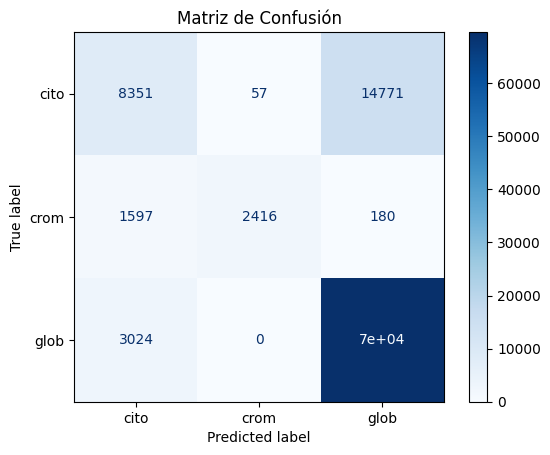

In [52]:
# Generar la matriz de confusión
cm = confusion_matrix(y_true, predicted_labels, labels=label_encoder.classes_)

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.show()